In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

age = 13.800797497330507

In [2]:
def read_timescales():
    '''Function to read in the data file which contains quenching and infall times'''
    data = []
    with open('../../Data/QuenchingTimescales.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

## Read in the data

Particle tracking data is stored at `Justice_League_Code/Data/tracked_particles.hdf5`. This HDF5 file format stores multiple tables efficiently and can be easily written to/read into `pandas`. Each galaxy that has been tracked is stored as a table in the HDF5 file under the key `{sim}_{z0haloid}`. For example:

In [3]:
path = '../../Data/tracked_particles.hdf5'
with pd.HDFStore(path) as hdf:
    print('Available keys:', *hdf.keys())

Available keys: /h148_13 /h148_28 /h148_37 /h148_68 /h229_20 /h229_22 /h242_24 /h242_80


We'll use `h242_24` for now. 

In [ ]:
keys = ['h148_']

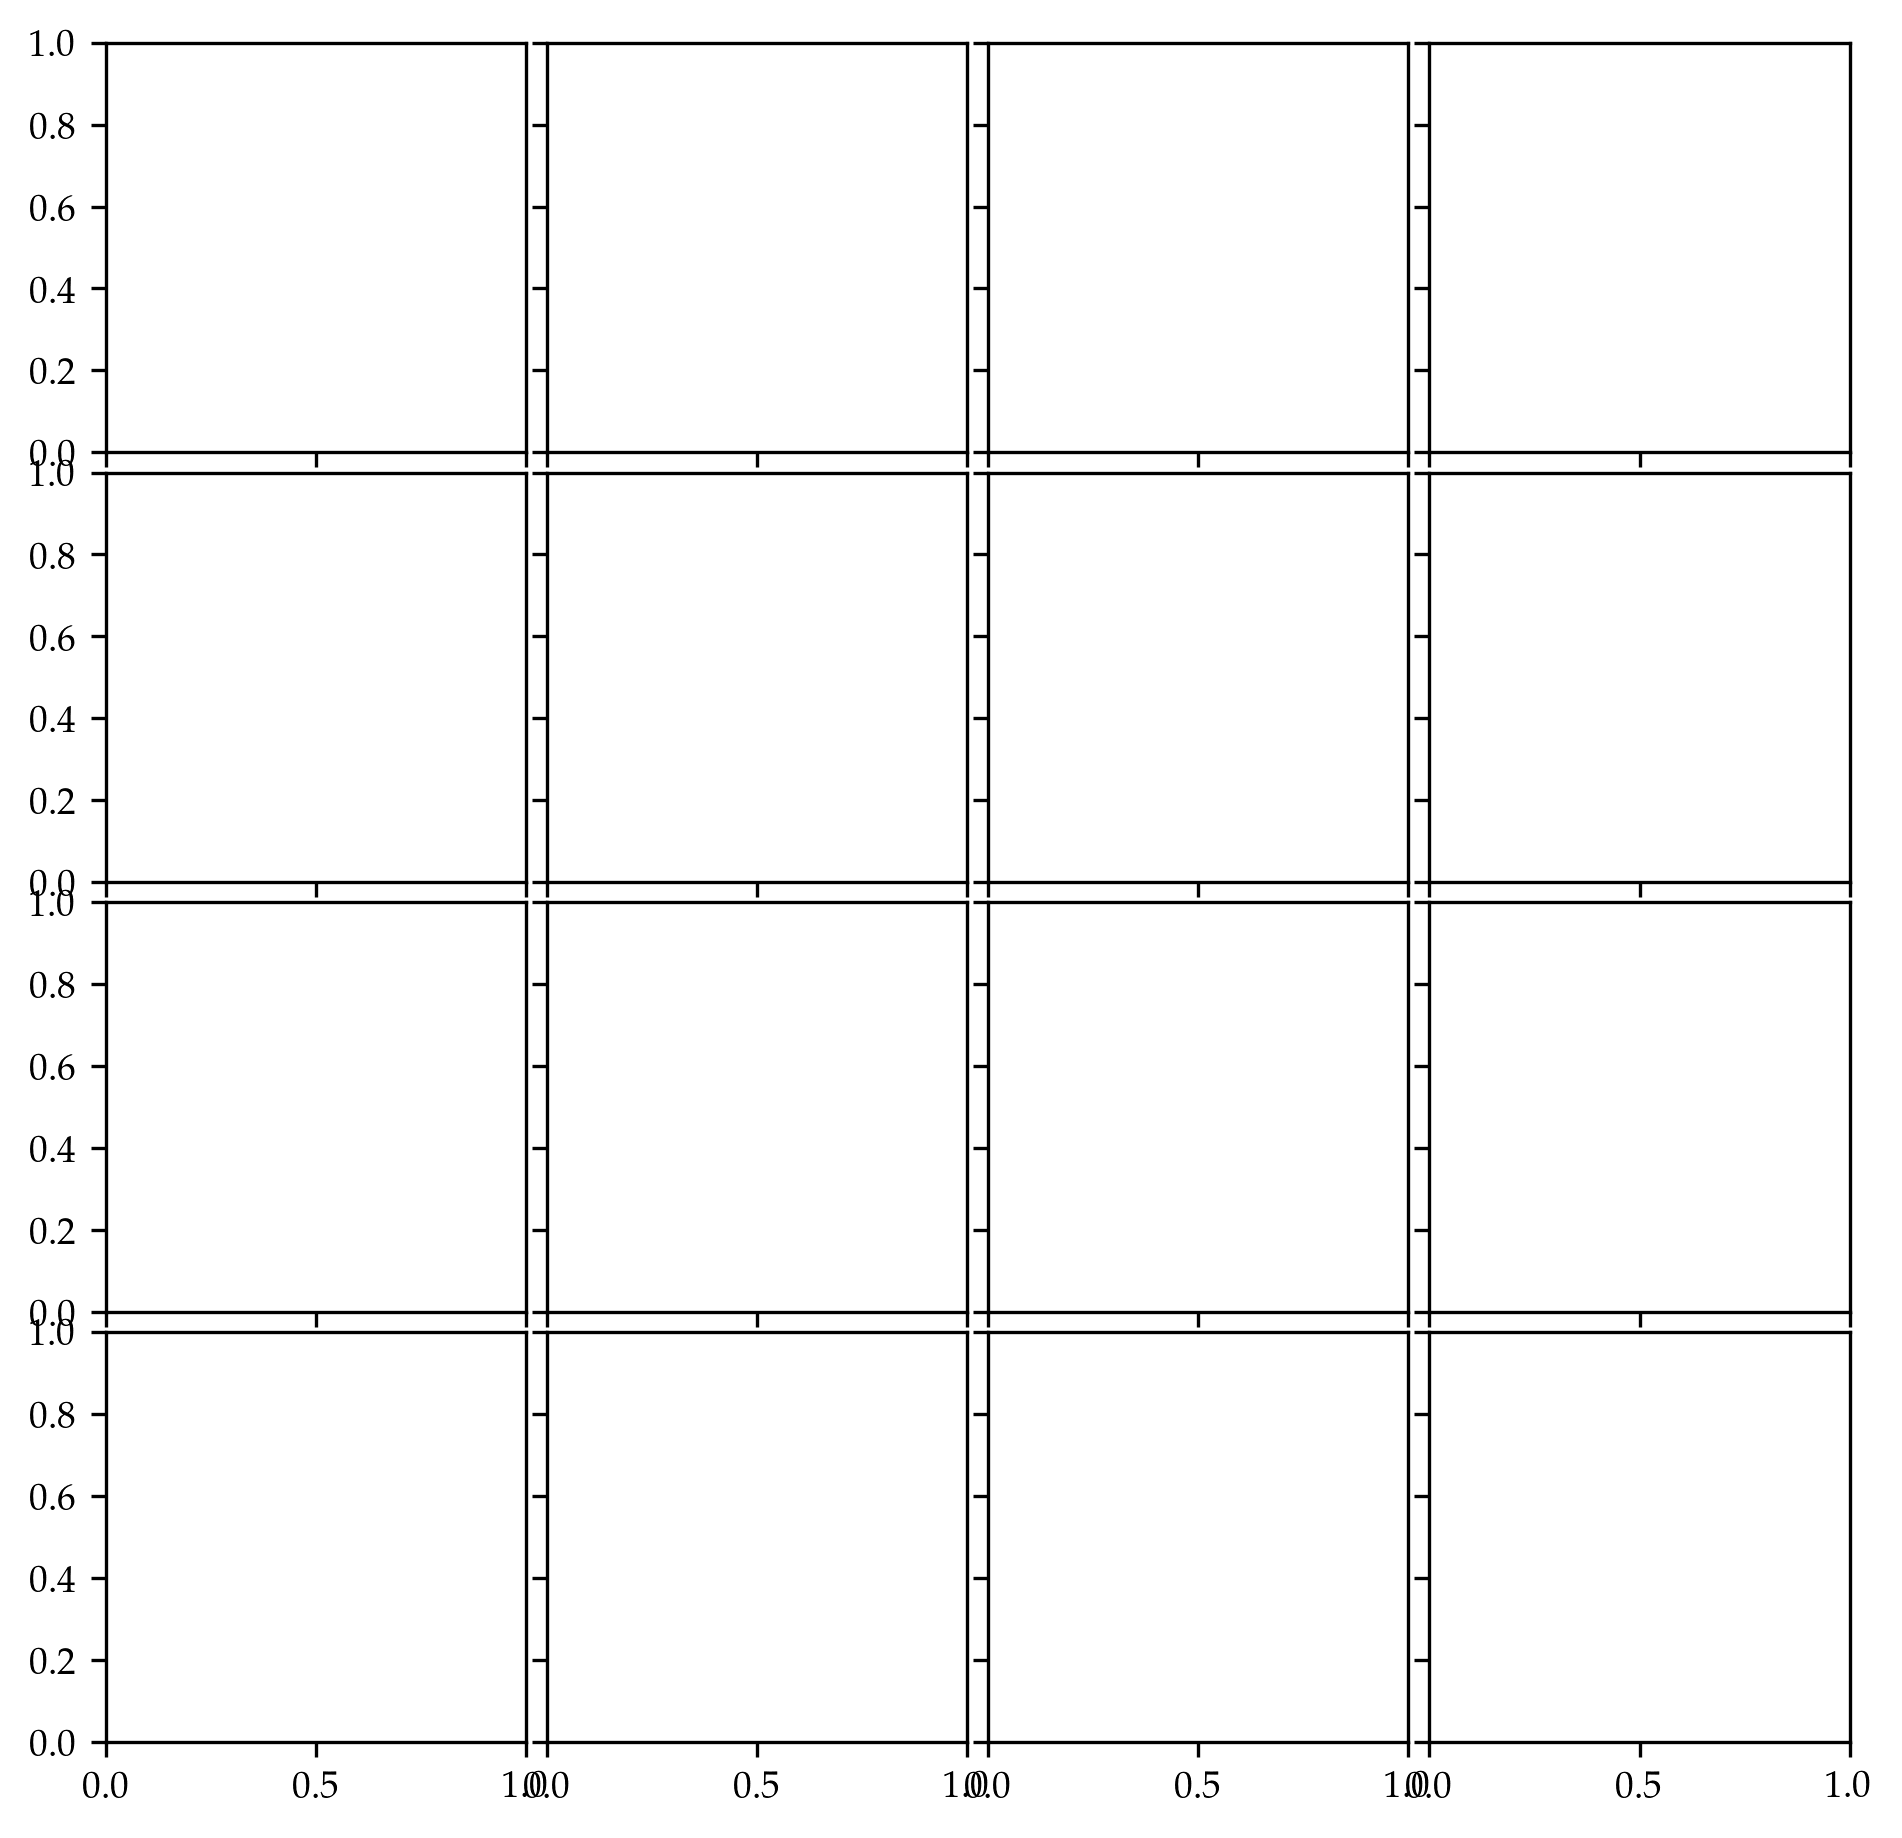

In [14]:
fig = plt.figure(dpi=300, figsize=(7.5,7.5))

gs = mpl.gridspec.GridSpec(nrows=4, ncols=4, figure=fig)
gs.update(hspace=0.05, wspace=0.05)

sat1_ax1 = plt.subplot(gs[0,0])
sat1_ax2 = plt.subplot(gs[1,0])
sat1_ax3 = plt.subplot(gs[2,0])
sat1_ax4 = plt.subplot(gs[3,0])
sat1_axes = np.array([sat1_ax1,sat1_ax2,sat1_ax3,sat1_ax4])

sat2_ax1 = plt.subplot(gs[0,1])
sat2_ax2 = plt.subplot(gs[1,1])
sat2_ax3 = plt.subplot(gs[2,1])
sat2_ax4 = plt.subplot(gs[3,1])
sat2_axes = np.array([sat2_ax1,sat2_ax2,sat2_ax3,sat2_ax4])

sat3_ax1 = plt.subplot(gs[0,2])
sat3_ax2 = plt.subplot(gs[1,2])
sat3_ax3 = plt.subplot(gs[2,2])
sat3_ax4 = plt.subplot(gs[3,2])
sat3_axes = np.array([sat3_ax1,sat3_ax2,sat3_ax3,sat3_ax4])

sat4_ax1 = plt.subplot(gs[0,3])
sat4_ax2 = plt.subplot(gs[1,3])
sat4_ax3 = plt.subplot(gs[2,3])
sat4_ax4 = plt.subplot(gs[3,3])
sat4_axes = np.array([sat4_ax1,sat4_ax2,sat4_ax3,sat4_ax4])

axes = np.array([sat1_axes,sat2_axes,sat3_axes,sat4_axes]).flatten()

for ax in np.array([sat2_axes[:-1],sat3_axes[:-1],sat4_axes[:-1]]).flatten():
    ax.tick_params(labelleft=False,labelbottom=False)
    
for ax in sat1_axes[:-1]:
    ax.tick_params(labelbottom=False)
    
for ax in np.array([sat2_axes[-1],sat3_axes[-1],sat4_axes[-1]]):
    ax.tick_params(labelleft=False)
    
for ax 

plt.show()

In [20]:
key = 'h242_24'
data = pd.read_hdf(path, key=key)
data

# Temporary code to fix classification issue 
# (forgot to exclude disk particles from the halo in particletracking.py, so some were being classified in both)

data = data.rename(columns={'sat_disk': 'sat_disk_wrong',
                            'host_disk': 'host_disk_wrong',
                            'sat_halo': 'sat_halo_wrong',
                            'host_halo': 'host_halo_wrong'})

data['sat_disk'] = (data.rho >= 0.1) & (data.temp <= 1.2e4) & (data.r <= 3)
data['sat_halo'] = (data.r_per_Rvir < 1) & ~data.sat_disk
data['host_disk'] = (data.rho >= 0.1) & (data.temp <= 1.2e4) & (data.r_per_Rvir > 1) & (data.h1dist < 0.1)
data['host_halo'] = (data.r_per_Rvir > 1) & (data.h1dist < 1) & ~data.host_disk

data

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,sat_disk_wrong,sat_halo_wrong,IGM,host_halo_wrong,host_disk_wrong,classification,sat_disk,sat_halo,host_disk,host_halo
0,5.181190,811077,0.000037,5.369499e+05,26510.536704,0.000000,317.229043,5.719189,-173.390813,23.552462,...,False,False,False,True,False,4.0,False,False,False,True
1,5.181190,6872943,0.000560,1.621470e+06,33820.435130,4.999814,305.111904,5.500734,-149.748558,152.158116,...,False,False,False,True,False,4.0,False,False,False,True
2,5.181190,8840402,0.000179,6.317682e+04,26510.536704,0.000000,352.882340,6.361967,133.276947,199.077824,...,False,False,True,False,False,5.0,False,False,False,False
3,5.181190,8987571,0.000017,2.664518e+05,26510.536704,0.000000,26.778647,0.482781,-9.585453,-3.929157,...,False,True,False,False,False,2.0,False,True,False,False
4,5.181190,9655109,0.000078,1.011527e+05,26510.536704,0.000000,16.040076,0.289180,-2.434631,-11.577726,...,False,True,False,False,False,2.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,13.800797,10503018,0.000018,2.953280e+05,26510.548793,0.000000,361.417481,7.212325,-312.938541,80.286533,...,False,False,False,True,False,4.0,False,False,False,True
10477,13.800797,10503024,0.000081,8.588152e+05,26520.522274,0.000000,240.255195,4.794451,-48.069470,61.066270,...,False,False,False,True,False,4.0,False,False,False,True
10478,13.800797,10503746,0.000117,1.134624e+06,26659.904046,5.228853,271.157246,5.411122,-121.951103,67.224175,...,False,False,False,True,False,4.0,False,False,False,True
10479,13.800797,10505840,0.000022,4.070112e+05,27619.316654,7.211029,267.735199,5.342833,14.907680,90.504259,...,False,False,False,True,False,4.0,False,False,False,True


## Basic plots of satellite orbit and particle paths

Plot the satellite orbit in $x-y$ and in $x-z$, and plot the paths of a random sample of $N$ tracked particles. 

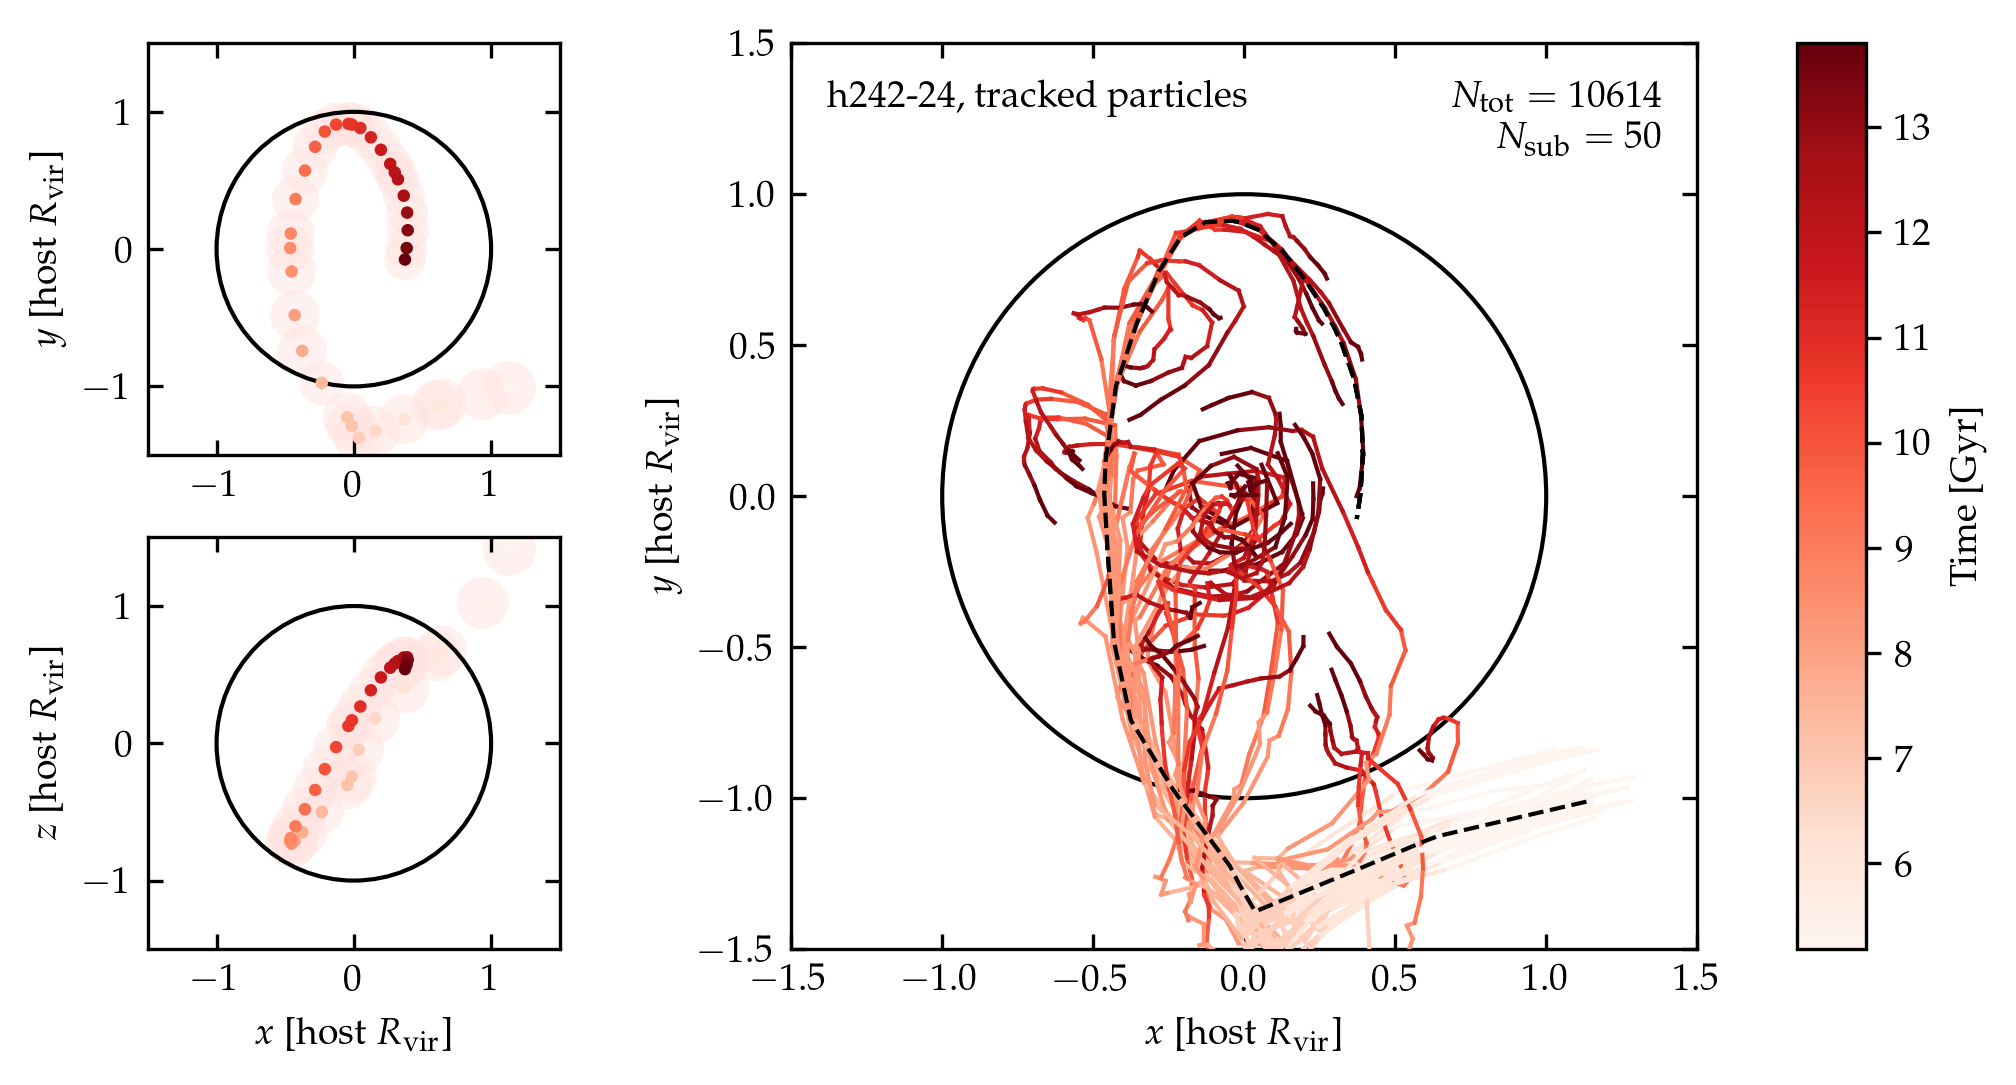

In [7]:
import astropy.units as u
from astropy.cosmology import Planck15, z_at_value

R = 1.5 # in Rvir, the maximum radius to plot 
N = 50 # number of particles to select in subsample

fig = plt.figure(dpi=300, figsize=(7.5,4))
gs = mpl.gridspec.GridSpec(2,5, width_ratios = [1,0.1,1,1,0.15], figure=fig)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0:,2:-1])
cbax = plt.subplot(gs[:,-1])

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax0.add_artist(host_radius)

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax1.add_artist(host_radius)

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax2.add_artist(host_radius)

x_rel, y_rel, z_rel, Rvirs, ts = np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
for t in np.unique(data.time):
    d = data[data.time==t]
    sat_x, sat_y, sat_z = np.mean(d.sat_Xc), np.mean(d.sat_Yc), np.mean(d.sat_Zc)
    host_x, host_y, host_z = np.mean(d.host_Xc), np.mean(d.host_Yc), np.mean(d.host_Zc)
    
    h1Rvir = np.mean(d.h1Rvir)
    satRvir = np.mean(d.satRvir)
    
    x_rel = np.append(x_rel, (sat_x-host_x)/h1Rvir)
    y_rel = np.append(y_rel, (sat_y-host_y)/h1Rvir)
    z_rel = np.append(z_rel, (sat_z-host_z)/h1Rvir)
    
    Rvirs = np.append(Rvirs, satRvir/h1Rvir*1100)
    
    radii = plt.Circle(((sat_x-host_x)/h1Rvir,(sat_y-host_y)/h1Rvir),
                     satRvir/h1Rvir, ec='none',fc='mistyrose', alpha=0.5, fill=True, zorder=0.5)
    ax0.add_artist(radii)
    
    radii = plt.Circle(((sat_x-host_x)/h1Rvir,(sat_z-host_z)/h1Rvir),
                     satRvir/h1Rvir, ec='none',fc='mistyrose', alpha=0.5, fill=True, zorder=0.5)
    ax1.add_artist(radii)
    
    ts = np.append(ts,t)
    
ax0.scatter(x_rel, y_rel, c=ts, cmap='Reds', s=4, zorder=2)
ax1.scatter(x_rel, z_rel, c=ts, cmap='Reds', s=4, zorder=2)
ax2.plot(x_rel, y_rel, 'k--', linewidth=1, zorder=1)
ax2.plot(x_rel, y_rel, 'k--', linewidth=1, zorder=1)
ax2.plot(x_rel, y_rel, 'k--', linewidth=1, zorder=1000)

pids = np.unique(data.pid)
np.random.seed(123)
pids_sub = np.random.choice(pids, size=N)

for j,pid in enumerate(pids_sub):
    d = data[data.pid==pid]
    
    cmap = mpl.cm.get_cmap('Reds', 12)
    tmin, tmax = np.min(d.time), np.max(d.time)
    
    # Temporary code
    # x,y,z need to be scaled by the scale factor a
    # for now calculating a from t, but could pull this directly from the sim
    z = np.array([z_at_value(Planck15.age, (t-0.01)*u.Gyr) for t in d.time])
    a = 1/(1+z)
    
    i_prev = 0
    for i in range(len(d)-1):
        i += 1
        h1Rvir = list(d.h1Rvir)[i_prev]
        x1 = list(d.x_rel_host)[i_prev] / h1Rvir / a[i_prev]
        y1 = list(d.y_rel_host)[i_prev] / h1Rvir / a[i_prev]
        z1 = list(d.z_rel_host)[i_prev] / h1Rvir / a[i_prev]
        
        h1Rvir = list(d.h1Rvir)[i]
        x2 = list(d.x_rel_host)[i] / h1Rvir / a[i]
        y2 = list(d.y_rel_host)[i] / h1Rvir / a[i]
        z2 = list(d.z_rel_host)[i] / h1Rvir / a[i]
        t = list(d.time)[i]
        
        c = cmap((t-tmin)/(tmax-tmin))
        ax2.plot([x1,x2],[y1,y2],color=c, linewidth=1, zorder=j)

        i_prev = i
    
cb1 = mpl.colorbar.ColorbarBase(cbax, cmap=mpl.cm.Reds, orientation='vertical', 
                                norm = mpl.colors.Normalize(vmin=tmin, vmax=tmax),
                                label='Time [Gyr]')

ax1.set_xlabel(r'$x$ [host $R_{\rm vir}$]')
ax1.set_ylabel(r'$z$ [host $R_{\rm vir}$]')
ax0.set_ylabel(r'$y$ [host $R_{\rm vir}$]')
ax2.annotate(f"{key.replace('_','-')}, tracked particles", (0.04, 0.96), xycoords='axes fraction', va='top')
ax2.annotate(r'$N_{\rm tot} =$' + fr' ${len(pids)}$'+'\n'+r'$N_{\rm sub} =$' + fr' ${N}$', 
            (0.96, 0.96), xycoords='axes fraction', va='top', ha='right')

ax0.set_xlim(-R,R)
ax0.set_ylim(-R,R)
ax1.set_xlim(-R,R)
ax1.set_ylim(-R,R)
ax2.set_xlim(-R,R)
ax2.set_ylim(-R,R)

ax0.set_aspect('equal')
ax1.set_aspect('equal')
ax2.set_aspect('equal')

ax2.set_xlabel(r'$x$ [host $R_{\rm vir}$]')
ax2.set_ylabel(r'$y$ [host $R_{\rm vir}$]')


ax0.tick_params(top=True,right=True,direction='in', which='both')
ax1.tick_params(top=True,right=True,direction='in', which='both')
ax2.tick_params(top=True,right=True,direction='in', which='both')

# plt.savefig(f'plots/orbits/{key}_orbit.pdf')

plt.show()